In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

TODOs:
- Chequear las funciones de coursera para visualizar 

In [83]:
fruits = pd.read_table('../../../Datasets/fruit_data_with_colors.txt')
fruits.head()

lookup_fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))
lookup_fruit_name

## Create a train test split

In [86]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=0) # train_size =0.75 by default

In [87]:
X_train.shape

(44, 3)

In [88]:
y_train.shape

(44,)

In [89]:
X_test.shape

(15, 3)

In [90]:
y_test.shape

(15,)

## Feature Pair Plot

In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [11]:
plt.style.use('seaborn-deep')

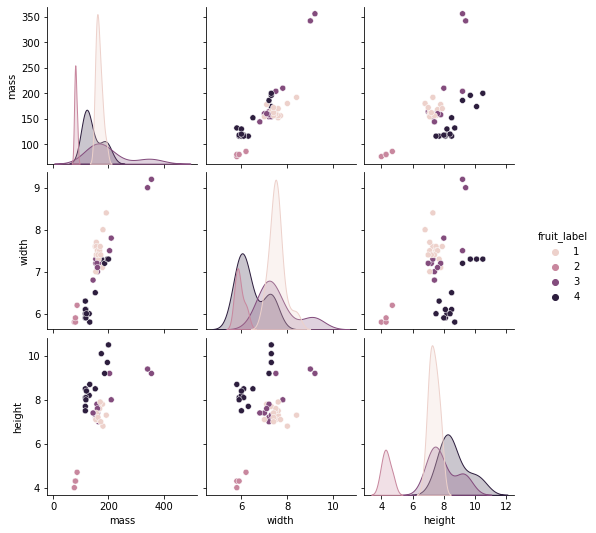

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data = X_train.join(y_train), hue = 'fruit_label', diag_kind = 'kde')

## Create a classifier object

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# creamos una instancia del objeto clasifier
knn = KNeighborsClassifier(n_neighbors=5)

## Train Classifier
We train the classifier using fit method (fir estimator)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Estimate de accuracy of the classifier on future data, using test data

In [15]:
knn.score(X_test, y_test)

0.5333333333333333

## Use the trained k-NN classifier model to classify new, previously unseen objects

In [16]:
X_test.head()

,mass,width,height
26,362,9.6,9.2
35,150,7.1,7.9
43,194,7.2,10.3
28,140,6.7,7.1
11,172,7.1,7.6


In [17]:
prediction = knn.predict([[50, 4.5, 6.8]])
lookup_fruit_name[prediction[0]]

/home/eduardo/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [18]:
prediction = knn.predict([[100, 6.5, 8.8]])
lookup_fruit_name[prediction[0]]

/home/eduardo/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

## Plot the decision boundaries of the kNN Classifier

In [19]:
#pip install graphviz

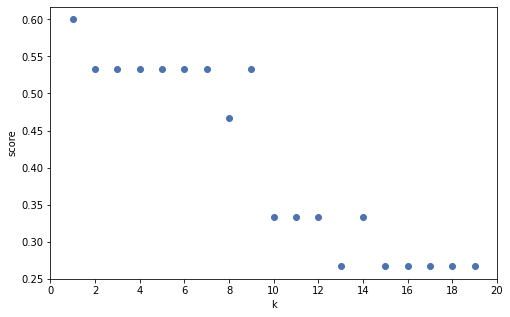

In [47]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
k_range = range(1,20)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(k_range, scores)
plt.xlabel('k')
plt.ylabel('score')
plt.xticks(range(0, 21, 2));



## Datasets

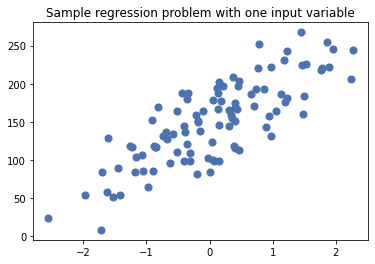

In [52]:
# Synthetic dataset for simple regression
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


plt.figure()

plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples= 100, n_features=1, 
                             n_informative=1, bias = 150, 
                             noise = 30, random_state = 0)

plt.scatter(X_R1, y_R1, marker= 'o', s = 50)
plt.show()

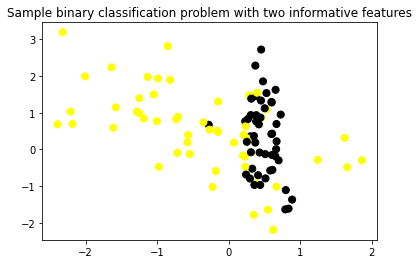

In [73]:
# Synthetic dataset for binary classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')
X, y = make_classification(n_samples = 100, n_features=2, 
                           n_redundant=0 , n_informative=2,
                           n_clusters_per_class=1, flip_y= 0.1, 
                           class_sep=0.5, random_state = 0)

plt.scatter(X[:, 0], X[:, 1], c = y, marker='o', s = 50, cmap=cmap_bold)
plt.show()

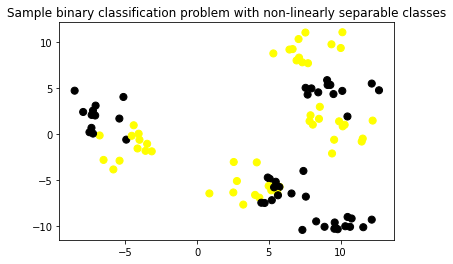

In [80]:
# more difficult synthetic dataset for classification (binary)
# with classes that are note linearly separable
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, n_features=2, centers= 8, 
                           cluster_std = 1.3, random_state=4)

y = y % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c = y, marker='o', s = 50, cmap=cmap_bold)
plt.show()

## K-Nearest Neighbors

### Classification

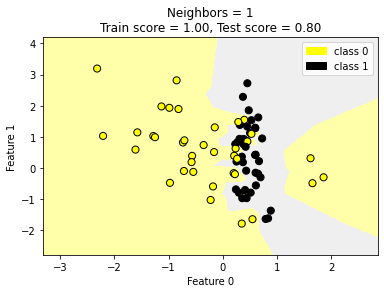

In [84]:
from adspy_shared_utilities import plot_two_class_knn
from sklearn.model_selection import train_test_split


X, y = make_classification(n_samples = 100, n_features=2, 
                           n_redundant=0 , n_informative=2,
                           n_clusters_per_class=1, flip_y= 0.1, 
                           class_sep=0.5, random_state = 0)
                           
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

plot_two_class_knn(X_train, y_train, 1 ,'uniform', X_test, y_test)

## Linear Models

In [2]:
# Synthetic dataset for simple regression
from sklearn.datasets import make_regression

X_R1, y_R1 = make_regression(n_samples= 100, n_features=1, 
                             n_informative=1, bias = 150, 
                             noise = 30, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1)

linreg =LinearRegression()
linreg.fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared train : {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared test: {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [42.61899017]
linear model intercept (b): 146.456
R-squared train : 0.629
R-squared test: 0.712


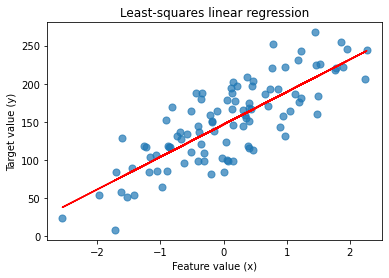

In [24]:
import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.7)
plt.plot(X_R1, linreg.intercept_+linreg.coef_*X_R1, c= 'red')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

## Ridge Regression
Ridge regression uses L2 regularization which reduce overfitting. 

Minimize sum of squares of w entries.

Alpha is the factor we multiply to L2 regularization. 

Use least squares as linear regression does.

Higher alpha ==> more regularization ==> simpler models.

1.0 alpha by default.

Feature Normalization is needed

Regularization is important when the number of instance are not so big

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import load_crime_dataset

X_crime, y_crime = load_crime_dataset()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime)

linridge = Ridge(alpha=20.0)
linridge.fit(X_train, y_train)

print('Ridge regression intercept (b) : {}'.format(linridge.intercept_))
print('Ridge regression coeff (w): {}'.format(linridge.coef_))
print('R-squared score (train): {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))



Ridge regression intercept (b) : -3128.494973000968
Ridge regression coeff (w): [-7.88431031e-04  9.46553473e-01  6.96949818e+00 -3.41824865e+01
  1.36301818e+01 -1.20894649e+01  1.01387181e-04  1.04681618e+00
 -9.96018614e-03 -8.98165142e+00  5.96716297e+00 -8.31720242e+00
  7.72462249e+00  9.28618263e+00 -8.42408965e+00  5.69279587e-03
  2.98142251e-03  2.29687066e-04 -9.60133290e+00 -1.33523751e+01
  1.18535785e+00  2.20082985e+00 -1.78600676e+00  1.40152366e+01
 -4.09687586e+00  1.35302225e+00  2.98468075e+00  4.70890295e+00
  6.66883566e+01  1.12758234e+01 -1.92676493e+01 -3.93123651e+01
  9.22009253e+00  8.66513243e+00 -2.54290766e+01  4.16051594e+00
  2.10301595e+00  1.07846125e+00 -9.79320720e+00 -7.42769068e-03
  6.89884756e+01  1.25655868e-03  2.39582472e+00 -3.11377873e+00
  1.60326495e+00  3.25397303e-01 -6.91667642e+00 -1.75811678e+01
 -1.90385867e+01  1.24999059e+01  9.15495235e-01 -1.76976866e+01
  1.73581609e+01 -3.50175153e+01  4.41445242e+01  6.57389596e+01
 -6.609872

In [22]:
# To scale, we use MinMaxScaler object: Fit and transform methods
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = Ridge(alpha= 20.0)
clf.fit(X_train_scaled, y_train)
r2_score = clf.score(X_test_scaled, y_test)

print(r2_score)

# It can be more efficient to do fitting and transforming together on the training set using fit_transform method
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = Ridge()
clf.fit(X_train_scaled, y_train)
r2_score = clf.score(X_test_scaled, y_test)

print(r2_score)

0.595577021745275
0.6400603441926944


In [27]:
## Rigde regression with non - feature normalization
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import load_crime_dataset

X_crime, y_crime = load_crime_dataset()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime)

linridge = Ridge(alpha=20.0)
linridge.fit(X_train, y_train)

print('Ridge regression without feature normalization')
print('Ridge regression intercept (b) : {}'.format(linridge.intercept_))
#print('Ridge regression coeff (w): {}'.format(linridge.coef_))
print('R-squared score (train): {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))

## Rigde regression with feature normalization
# To scale, we use MinMaxScaler object: Fit and transform methods
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = Ridge(alpha = 20.0)
clf.fit(X_train_scaled, y_train)
print('-------------------------------------------')
print('Ridge regression with feature normalization')
print('Ridge regression intercept (b) : {}'.format(clf.intercept_))
#print('Ridge regression coeff (w): {}'.format(clf.coef_))
print('R-squared score (train): {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(clf.score(X_test_scaled, y_test)))

Ridge regression without feature normalization
Ridge regression intercept (b) : -5703.998368693408
R-squared score (train): 0.665
R-squared score (test): 0.639
-------------------------------------------
Ridge regression with feature normalization
Ridge regression intercept (b) : 918.9397098163827
R-squared score (train): 0.611
R-squared score (test): 0.615


In [35]:
print('Ridge regression: Efects of alpha regularization \n')
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for value in [0, 1, 10, 20, 50, 100, 1000]:

    clf = Ridge(alpha = value)
    clf.fit(X_train_scaled, y_train)
    r2_score_train = clf.score(X_train_scaled, y_train)
    r2_score_test = clf.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}, r-squared train = {:.4f}, r-squared test = {:.4f}'.format(value, r2_score_train, r2_score_test))


Ridge regression: Efects of alpha regularization 

Alpha = 0.00, r-squared train = 0.6659, r-squared test = 0.6407
Alpha = 1.00, r-squared train = 0.6532, r-squared test = 0.6445
Alpha = 10.00, r-squared train = 0.6264, r-squared test = 0.6274
Alpha = 20.00, r-squared train = 0.6107, r-squared test = 0.6152
Alpha = 50.00, r-squared train = 0.5803, r-squared test = 0.5909
Alpha = 100.00, r-squared train = 0.5458, r-squared test = 0.5612
Alpha = 1000.00, r-squared train = 0.3048, r-squared test = 0.3180


## Lasso Regression
Aplica regularización al igual que rigde regression con la diferencia de que usa la regulación L1. Reduce la suma de los valores absolutos de w (en lugar de la suma de los cuadrados como los hace L2) 

Tiende a poner 0 a las coeficientes(w) es una especie de feature selection

Alpha controls the amoung of l1 regresion. default 1

**Se usa cuando hay pocas variables que pueden influir en la regresion**. **Caso contrario se usa o es mejor usar Rigde regresion**

In [60]:
## Rigde regression with feature normalization
# To scale, we use MinMaxScaler object: Fit and transform methods
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = Lasso(alpha = 2.0, max_iter=10000)
clf.fit(X_train_scaled, y_train)
print('-------------------------------------------')
print('Ridge regression with feature normalization')
print('Ridge regression intercept (b) : {}'.format(clf.intercept_))
print('Ridge regression coeff (w): {}'.format(clf.coef_))
print('R-squared score (train): {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(clf.score(X_test_scaled, y_test)))


-------------------------------------------
Ridge regression with feature normalization
Ridge regression intercept (b) : 1186.612061998579
Ridge regression coeff (w): [    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.        

In [70]:
print(f'Cantidad de features con w diferente de 0: {len([value for value in list(clf.coef_) if value!=0 ])}')

Cantidad de features con w diferente de 0: 20


In [63]:
print('Variables con w diferente de 0')
for e in sorted(list(zip(list(X_crime), clf.coef_))):
    if e[1] !=0: 
        print(f' {e[0], e[1]}')

Variables con w diferente de 0
 ('HousVacant', 459.53799903358436)
 ('MalePctDivorce', 259.3288922599622)
 ('MedOwnCostPctIncNoMtg', -104.57143405478098)
 ('MedYrHousBuilt', 91.41202242433931)
 ('NumInShelters', 264.9320655456729)
 ('OwnOccHiQuart', 73.14365855972191)
 ('PctBornSameState', -49.393551878307086)
 ('PctEmplManu', -57.52991965779481)
 ('PctForeignBorn', 23.448864495369126)
 ('PctKids2Par', -1188.7396867043215)
 ('PctKidsBornNeverMar', 1488.3651222865142)
 ('PctLargHouseFam', 20.144194150328158)
 ('PctPersDenseHous', 339.04468804185217)
 ('PctSameCity85', 5.197753692189867)
 ('PctVacantBoarded', 122.69221825705178)
 ('PctWorkMom', -231.42347299198704)
 ('RentQrange', 86.35600041637117)
 ('agePct12t29', -168.18346054422747)
 ('pctUrban', 119.69381940226302)
 ('pctWInvInc', -169.67564456492522)


## Polynomiam Regression  
El añadir grados a los polinomios permite tener mejor performance tanto en training como en testing

In [79]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split

X_F1, y_F1 = make_friedman1(n_samples = 100,
                            n_features = 7, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)
print('R-squared in train. {:.3f}'.format(linreg.score(X_train, y_train)))
print('R_squared in test. {:.3f}'.format(linreg.score(X_test, y_test)))

print('-----------------------------')
print('Polinomial Squared degree 2')
print('-----------------------------')

poly = PolynomialFeatures(degree = 2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)
print('R-squared in train. {:.3f}'.format(linreg.score(X_train, y_train)))
print('R_squared in test. {:.3f}'.format(linreg.score(X_test, y_test)))
print('Polinomial Squared degree 2')


[ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
1.5425091975373029
R-squared in train. 0.722
R_squared in test. 0.722
-----------------------------
Polinomial Squared degree 2
-----------------------------
[ 1.87816774e-13  2.04925399e+01  3.34651107e+01 -2.13907740e+01
  9.33716451e+00  9.39114356e+00  6.52600499e+00 -8.19116391e-01
 -1.11406469e+01 -4.05223083e+00  4.54237574e-01  3.20065565e+00
 -8.47603442e-01 -3.43826559e+00  1.36210164e-01 -2.29811351e+01
  7.00293396e+00 -2.51464552e+00 -3.09646078e+00 -2.60006146e+00
 -4.13149295e+00  1.77640120e+01 -1.88779405e+00 -4.01164639e-03
  4.07838197e-01  1.32090563e+00  4.15733955e-02  8.41254202e-01
 -1.12222279e+00  3.62644221e+00  2.80375474e+00 -8.05984487e+00
 -6.68868649e+00  1.45747962e+00 -3.82258427e-01  5.06353610e+00]
-6.2596515639592045
R-squared in train. 0.975
R_squared in test. 0.787
Polinomial Squared degree 2


## Logistic Regression

In logistic regression C control the amont of regularization L2 (inverso a alpha en ridge regression)

Less C greater regularization

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

fruits = pd.read_table('../../../Datasets/fruit_data_with_colors.txt')

lookup_fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))

X_fruits_2d = fruits[['mass', 'width', 'height']]
y_fruits_2d = fruits['fruit_label']


#fig, subaxes = plt.subplots(1,1, figsize = (7,5))
#y_fruits_apple = y_fruits_2d == 1 # Transform 1/0 to True/False

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state=0)

print('Logistic Regression Models')
for i in [0.1, 1, 10, 25, 50, 100]:

    clf = LogisticRegression(C=i)
    clf.fit(X_train, y_train)
    print('Test Train with C {}: {:.3f}'.format(i,clf.score(X_train, y_train)))
    print('Test Score with C {}: {:.3f}'.format(i,clf.score(X_test, y_test)))
    print('==================================================================')

Logistic Regression Models
Test Train with C 0.1: 0.841
Test Score with C 0.1: 0.467
Test Train with C 1: 0.818
Test Score with C 1: 0.467
Test Train with C 10: 0.909
Test Score with C 10: 0.600
Test Train with C 25: 0.886
Test Score with C 25: 0.667
Test Train with C 50: 0.886
Test Score with C 50: 0.733
Test Train with C 100: 0.886
Test Score with C 100: 0.733


/home/eduardo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/eduardo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [116]:
# More regularization reduce overfitting

## Support Vector Machines
- The strenght of regularization is control by C.
- Larger values of C. Less regularization. (each individual data point is important to classify correctly)
- Smaller values of C. More regularization. (prevents overfitting, more tolerant of errors on individual data points.)


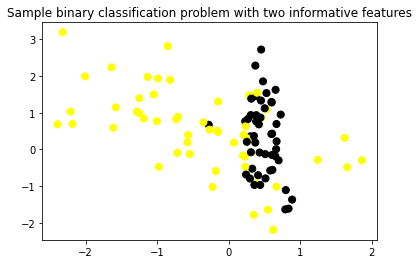

In [120]:
# synthetic dataset for classification (binary) 
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [125]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

print('Linear Support Vector Classifier:')
for i in [0.00001, 1, 100.0]:

    clf = LinearSVC(C = i)
    clf.fit(X_train, y_train)
    print('Train score with C = {} : {:.3f}'.format(i,clf.score(X_train, y_train)))
    print('Test score with C = {} : {:.3f}'.format(i,clf.score(X_test, y_test)))
    print('=======================================================================')



Linear Support Vector Classifier:
Train score with C = 1e-05 : 0.760
Test score with C = 1e-05 : 0.760
Train score with C = 1 : 0.813
Test score with C = 1 : 0.840
Train score with C = 100.0 : 0.787
Test score with C = 100.0 : 0.760


/home/eduardo/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [131]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cancer = load_breast_cancer()

X_cancer, y_cancer = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

print('SVC in cancer datasets')
print('======================================================================')

for i in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]:

    clf = SVC(C=i)
    clf.fit(X_train, y_train)
    print('Train score with C = {} : {:.3f}'.format(i, clf.score(X_train, y_train)))
    print('Test score with C = {} : {:.3f}'.format(i, clf.score(X_test, y_test)))
    print('======================================================================')

SVC in cancer datasets
Train score with C = 0.001 : 0.627
Test score with C = 0.001 : 0.629
Train score with C = 0.01 : 0.770
Test score with C = 0.01 : 0.776
Train score with C = 0.1 : 0.887
Test score with C = 0.1 : 0.902
Train score with C = 1.0 : 0.904
Test score with C = 1.0 : 0.937
Train score with C = 10.0 : 0.915
Test score with C = 10.0 : 0.937
Train score with C = 100.0 : 0.941
Test score with C = 100.0 : 0.944


In [132]:
i = 1
clf = SVC(C=i)
clf.fit(X_train, y_train)
print('Train score with C = {} : {:.3f}'.format(i, clf.score(X_train, y_train)))
print('Test score with C = {} : {:.3f}'.format(i, clf.score(X_test, y_test)))

Train score with C = 1 : 0.904
Test score with C = 1 : 0.937


## Kernel Support Vector Machines
- We use those models when the problem is not linearly separable.
- Kernel is a similarity measure between data points. It is a kind of dot product
- Gamma parameter: small gamma ==> larger similarity radius ==> More points are group together; larger gamma ==> Points have to be closer to be considered similar

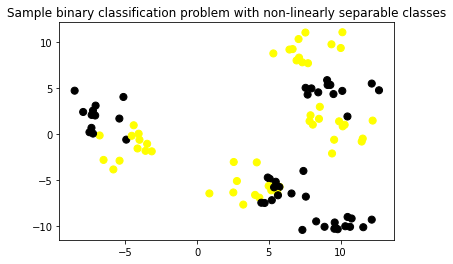

In [133]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [134]:
from random import random
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

clf = SVC().fit(X_train, y_train)
clf = SVC(kernel = 'poly', degree = 3).fit(X_train, y_train)

In [143]:
## Support Vector Machine with cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_cancer, y_cancer = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = SVC().fit(X_train, y_train)
clf2 = SVC().fit(X_train_scaled, y_train)

print('Breast cancer dataset (unnormalized features)')
print('Train Score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test Score: {:.3f}'.format(clf.score(X_test, y_test)))

print('Breast cancer dataset (normalized features with MinMaxScaler)')
print('Train Score: {:.3f}'.format(clf2.score(X_train_scaled, y_train)))
print('Test Score: {:.3f}'.format(clf2.score(X_test_scaled, y_test)))



Breast cancer dataset (unnormalized features)
Train Score: 0.904
Test Score: 0.937
Breast cancer dataset (normalized features)
Train Score: 0.984
Test Score: 0.972


In [144]:
## Support vector machines work well for both low and high dimensional data
## Lento cuando el dataset supera los 50k casos
## Needs normalization and parameter tuning
## Difficult to interpret why a prediction was made.
## Main parameters of the kernelized support vector machine
### kernel: Type of the kernel function to be used. (rbf is the default)
### kernel parameters : gamma 
### C: regularization parameter
### Tipically C and gamma are tunned at the same time.

## Cross Validation

In [156]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

fruits = pd.read_table('../../../Datasets/fruit_data_with_colors.txt')

lookup_fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))


X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

X_train, X_test, y_train, t_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(clf, X, y, cv = 3)

print('Cross validation scores (3 -folds):', cv_scores)
print('Mean cross validation score (3 -folds){:.3f}'.format(np.mean(cv_scores)))

Cross validation scores (3 -folds): [0.6        0.55       0.52631579]
Mean cross validation score (3 -folds)0.559


In [158]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3,3,4)

train_scores, test_scores = validation_curve(SVC(), X, y, param_name='gamma', 
                                                          param_range=param_range, 
                                                          cv =3)

In [159]:
print(train_scores)

[[0.69230769 0.74358974 0.75      ]
 [0.79487179 0.8974359  0.975     ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]]


In [161]:
print(test_scores)

[[0.55       0.5        0.63157895]
 [0.4        0.5        0.47368421]
 [0.35       0.45       0.47368421]
 [0.3        0.4        0.31578947]]


## Decision Trees
In practice adjusting only one of the following:
- max_depth
- min_samples_leaf
- max_leaf_nodes
Will be enough to reduce overfitting

Train Score 1.000
Test Score 0.974


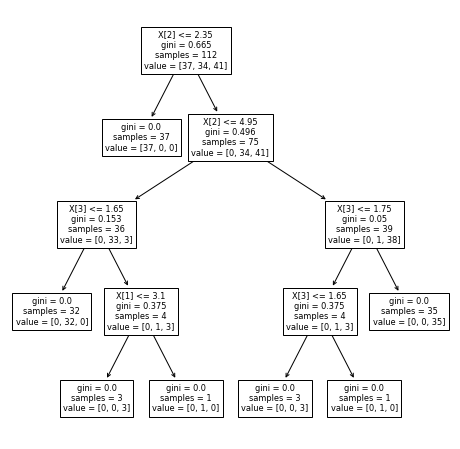

In [177]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Train Score {:.3f}'.format(clf.score(X_train, y_train)))
print('Test Score {:.3f}'.format(clf.score(X_test, y_test)))

plt.figure(figsize =(8, 8))
tree.plot_tree(clf)
plt.show()


In [179]:
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

print('Train Score {:.2f}'.format(clf.score(X_train, y_train)))
print('Test Score {:.2f}'.format(clf.score(X_test, y_test)))

Train Score 0.98
Test Score 0.97


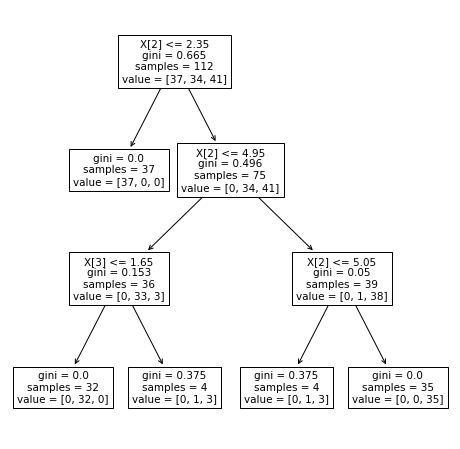

In [180]:
plt.figure(figsize =(8, 8))
tree.plot_tree(clf)
plt.show()

In [181]:
clf.feature_importances_

array([0.      , 0.      , 0.944014, 0.055986])

## Model Evaluation

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()

X, y = dataset.data, dataset.target

In [12]:
for class_name, class_count in zip(dataset.target, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [16]:
y_binary_imbalance = y.copy()
y_binary_imbalance[y_binary_imbalance!=1] = 0 

print('Original labels:   ', y[1:30])
print('New binary labels: ', y_binary_imbalance[1:30])

Original labels:    [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:  [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [27]:
for class_name, class_count in zip(np.unique(y_binary_imbalance), np.bincount(y_binary_imbalance)):

    print('Class name {} Class count {}'.format(class_name, class_count))


Class name 0 Class count 1615
Class name 1 Class count 182


In [30]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalance, random_state = 0)

svm = SVC(kernel = 'rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

## Dummy Classifiers

In [32]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

y_dummy_predictions = dummy_majority.predict(X_test)
y_dummy_predictions


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
dummy_majority.score(X_test, y_test)
## dummy classifiers server as a sanity check on your classifiers performance

0.9044444444444445

In [35]:
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

## Confusion Matrix
- Binary two class confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

y_majority_predicted = dummy_majority.predict(X_test)

confusion = confusion_matrix(y_test, y_majority_predicted)
print('Most frequent class (dummy classifier) \n', confusion)

Most frequent class (dummy classifier) 
 [[407   0]
 [ 43   0]]


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='stratified').fit(X_train, y_train)

y_classprop_predicted = dummy_majority.predict(X_test)

confusion = confusion_matrix(y_test, y_classprop_predicted)
print('Random class-proportional prediction (dummy classifier) \n', confusion)

Random class-proportional prediction (dummy classifier) 
 [[357  50]
 [ 42   1]]


In [44]:
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalance, random_state = 0)

svm = SVC(kernel = 'linear', C=1).fit(X_train, y_train)
y_pred = svm.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print('Support Vector Machine Classifier (linear kernel, C=1) \n', confusion)

Support Vector Machine Classifier (linear kernel, C=1) 
 [[402   5]
 [  5  38]]


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalance, random_state = 0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print('Logistic Regresion Classifier \n', confusion)

Logistic Regresion Classifier 
 [[401   6]
 [  8  35]]


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalance, random_state = 0)

dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print('Decision Tree Classifier \n', confusion)

Decision Tree Classifier 
 [[402   5]
 [  8  35]]


## Evaluation metrics for binary classification

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Precision {:.3f}'.format(precision_score(y_test, y_pred)))
print('Recall {:.3f}'.format(recall_score(y_test, y_pred)))
print('F1 score {:.3f}'.format(f1_score(y_test, y_pred)))

Accuracy 0.971
Precision 0.875
Recall 0.814
F1 score 0.843


In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names = ['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.88      0.81      0.84        43

    accuracy                           0.97       450
   macro avg       0.93      0.90      0.91       450
weighted avg       0.97      0.97      0.97       450



## Decision Functions

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalance, random_state =0 )

y_scores_lr = LogisticRegression().fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))
y_score_list

[(0, -29.828780005398418),
 (0, -19.38286115307715),
 (0, -29.198494493791305),
 (0, -21.746286899585108),
 (0, -22.64237662747598),
 (0, -11.805929908262387),
 (1, 6.496007465102329),
 (0, -23.354618411873822),
 (0, -27.543821916921196),
 (0, -26.888211945782295),
 (0, -31.86297207952801),
 (0, -22.486080629470433),
 (0, -25.31802897331022),
 (0, -13.384518026043816),
 (0, -13.565643892840617),
 (0, -13.308351392745012),
 (1, 12.180940558159868),
 (0, -34.36242997745533),
 (0, -13.231544471648677),
 (0, -29.593983589704244)]

In [ ]:
## predict_proba (choose the most likely class) threshold > 0.50


Cantidad de clases a predecir [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 42.0, 'Predicted Label')

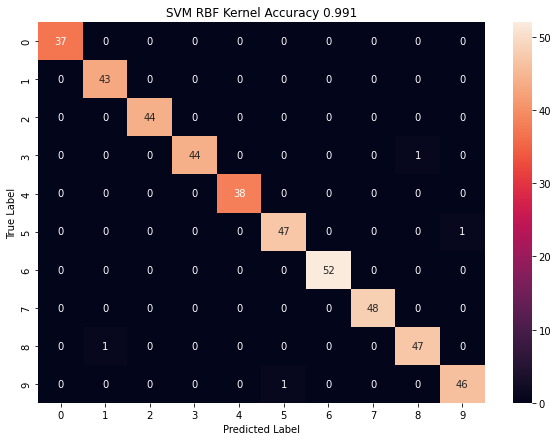

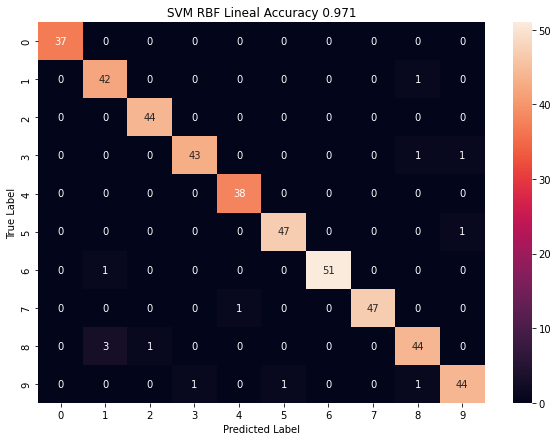

In [97]:
## Precision and Recall Curves
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score


dataset = load_digits()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, random_state = 0)

print(f'Cantidad de clases a predecir {np.unique(y_test)}')

############################################
# Using rbf kernel
############################################

svm = SVC(kernel ='rbf', C=1.0).fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred) # el resultado es un numpy array
df_cm = pd.DataFrame(cm)

plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot = True)
plt.title('SVM RBF Kernel Accuracy {:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

############################################
# Using rbf linear
############################################

svm = SVC(kernel ='linear', C=1.0).fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred) # el resultado es un numpy array
df_cm = pd.DataFrame(cm)

plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot = True)
plt.title('SVM RBF Lineal Accuracy {:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')



In [98]:
# multiclass clasification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [99]:
## macro average precision: consider the amount of each class
## micro average precision: take into consideration the amont of each class

In [100]:

print('Macro average precision = {:.3f} (treat class equally) '.format(precision_score(y_test, y_pred, average = 'macro')))
print('Micro average precision = {:.3f} (treat instances equally) '.format(precision_score(y_test, y_pred, average = 'micro')))


Macro average precision = 0.971 (treat class equally) 
Micro average precision = 0.971 (treat instances equally) 


In [101]:

print('Macro average F1 score = {:.3f} (treat class equally) '.format(f1_score(y_test, y_pred, average = 'macro')))
print('Micro average F1 score = {:.3f} (treat instances equally) '.format(f1_score(y_test, y_pred, average = 'micro')))


Macro average F1 score = 0.972 (treat class equally) 
Micro average F1 score = 0.971 (treat instances equally) 


## Regression Evaluation

Linear model coefficients -698.000
Mean squared error (dummy regressor) 4965.126
Mean squared error (linear regressor) 4646.740
r2_score (dummy regressor) -0.000
r2_score (lineara regressor) 0.064


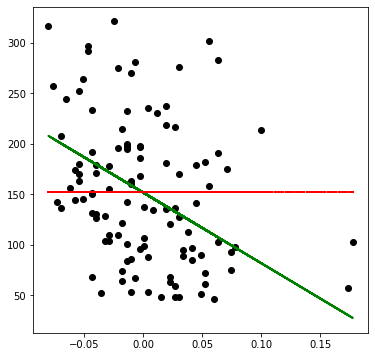

In [150]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor # Could be used in order to have a baseline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

diabetes = load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_regressor = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_pred = lm.predict(X_test)
y_pred_dummy_mean = lm_dummy_regressor.predict(X_test)

print('Linear model coefficients {:.3f}'.format(int(lm.coef_)))
print('Mean squared error (dummy regressor) {:.3f}'.format(mean_squared_error(y_test, y_pred_dummy_mean)))
print('Mean squared error (linear regressor) {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score (dummy regressor) {:.3f}'.format(r2_score(y_test, y_pred_dummy_mean)))
print('r2_score (lineara regressor) {:.3f}'.format(r2_score(y_test, y_pred)))

plt.figure(figsize=(6,6))
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test, y_pred, color = 'green', linewidth=2)
plt.plot(X_test, y_pred_dummy_mean, color= 'red', linestyle = 'dashed', linewidth=2, label = 'dummy')

# En este caso el modelo da un toquecito mejor que imputar por el promedio


## Model selection using evaluation metrics

In [170]:
## cross-validation example
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target ==1 # si es 1 es true, caso contrario es false

clf = SVC(C=1.0, kernel='linear')

print('Cross validation (accuracy) {}'.format(cross_val_score(clf, X, y, cv = 5)))
print('Cross validation (roc_auc) {}'.format(cross_val_score(clf, X, y, cv = 5, scoring = 'roc_auc')))
print('Cross validation (recall) {}'.format(cross_val_score(clf, X, y, cv = 5, scoring = 'recall')))

Cross validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross validation (roc_auc) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


In [175]:
## grid search
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

dataset = load_digits()

X, y = dataset.data, dataset.target == 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# Optimizamos el modelo en base al accuracy:

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

y_decision_fn_score_acc = grid_clf_acc.decision_function(X_test)

print('Grid best parameter (max. accuracy) {}'.format(grid_clf_acc.best_params_))
print('Grid best score (max. accuracy) {}'.format(grid_clf_acc.best_score_))

# Optimizamos el modelo en base a la curva roc:

grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)

y_decision_fn_score_auc = grid_clf_auc.decision_function(X_test)

print('Grid best parameter (max. auc) {}'.format(grid_clf_auc.best_params_))
print('Grid best score (max. auc) {}'.format(grid_clf_auc.best_score_))

Grid best parameter (max. accuracy) {'gamma': 0.001}
Grid best score (max. accuracy) 0.9985157648354676
Grid best parameter (max. auc) {'gamma': 0.001}
Grid best score (max. acu) 1.0


## Evaluation metrics supported by model selection

In [183]:
from sklearn.metrics._scorer import SCORERS


sorted(list(SCORERS.keys()))


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

## Naive Bayes Classifiers
- They are naive because they assume that feature are conditionally indenpendent, given the class
- In other words, that the features are not correlated ewith each other.
- Generalization is worse than more sophisticated learning methods.
- Bernoulli/Multinomial is a good option to classify texts.
- Focus on Gaussian

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2)


nbclf = GaussianNB().fit(X_train, y_train)

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_cancer , y_cancer= cancer['data'], cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GaussianNB().fit(X_train, y_train)

print('Breast cancer dateset')
print('Accuracy GaussianNB classifier on training set: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy GaussianNB classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))




Breast cancer dateset
Accuracy GaussianNB classifier on training set: 0.951
Accuracy GaussianNB classifier on test set: 0.937


## Random Forest
It is an emsable of trees.

Doesnt require careful normalization of feature or intense parameter tunning

They are not so good for text classification

In [28]:
## Algunos parámetros importantes:
## n_estimators: number of trees to use in emsemble (default: 10)
## max_features: has a strong effect on performance. Influences the diversity of trees in the forest
## max_depth: controls the depth of the tree
## n_jobs: How many cores to use in parallel during training
## random_state

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_features=8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set {:.3f}'.format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set 1.000
Accuracy of RF classifier on test set 0.972


## Gradient Boosted Decision Trees
- learning_rate controls how hard each new tree tries to correct remaining mistakes for previous round.
- Not recommended for text classification
- Key parameters:
    n_estimators: set # of small decision trees to use (weak learners) in the ensamble
    learning_rate: controls emphasis on fixing errors from previous iteration.
    (both two are typically tuned together.)
- max_depth: is tipically set to a small value (e.g. 3-5) for most applications.

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2)

clf = GradientBoostingClassifier().fit(X_train, y_train)



In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data['data'], data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y) 

clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

print('Breast cancer dataset learninig_rate = 0.1, max_depth =3')
print('Accuracy in GBDT Classifier in training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy in GBDT Classifier in test set: {:.2f}'.format(clf.score(X_test, y_test)))



clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

print('Breast cancer dataset learninig_rate = 0.01, max_depth =2')
print('Accuracy in GBDT Classifier in training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy in GBDT Classifier in test set: {:.2f}'.format(clf.score(X_test, y_test)))




Breast cancer dataset learninig_rate = 0.1, max_depth =3
Accuracy in GBDT Classifier in training set: 1.00
Accuracy in GBDT Classifier in test set: 0.95
Breast cancer dataset learninig_rate = 0.01, max_depth =2
Accuracy in GBDT Classifier in training set: 0.96
Accuracy in GBDT Classifier in test set: 0.95


## Neural Networks
- hidden_layer_sizes: 100 by default. It is a list of hidden layer size. If there is just one layer we pass a list of one value. (Número de neuronas en cada capa)
- solver: Specifies the algorithm to use for learning the weights of the network. (lbfgs)
-  For neural networks their weights are initialized randomly 
- The regularization parameter for MLP is alpha (like linear regresion models) has a small value for default like 0.0001 (Gives a litle bit for regularization)

In [42]:
## Neural Networks for Machine Learning by Jeff Hinton
## Multi - layer perceptron (sklearn)
## relu activation function is the default in sklearn

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split



X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)  

# Example of one hidden layers 10 hidden_layer_sizes
nnclf = MLPClassifier(hidden_layer_sizes=[10], solver = 'lbfgs', random_state=0).fit(X_train, y_train)  

print('Blobs dataset')
print('Accuracy in MLPClassifier in training set {:.3f}'.format(nnclf.score(X_train, y_train)))
print('Accuracy in MLPClassifier in test set {:.3f}'.format(nnclf.score(X_test, y_test)))

# Example of two hidden layers 10 hidden_layer_sizes each one
nnclf = MLPClassifier(hidden_layer_sizes=[10, 10], solver = 'lbfgs', random_state=0).fit(X_train, y_train)  

print('Accuracy in MLPClassifier in training set {:.3f}'.format(nnclf.score(X_train, y_train)))
print('Accuracy in MLPClassifier in test set {:.3f}'.format(nnclf.score(X_test, y_test)))

Blobs dataset
Accuracy in MLPClassifier in training set 0.933
Accuracy in MLPClassifier in test set 0.680
Accuracy in MLPClassifier in training set 0.933
Accuracy in MLPClassifier in test set 0.720


In [44]:
# Creating multiple MLPClassifiers changing the number of alpha == > controls regularization ==> more alpha +regularization
import warnings
warnings.filterwarnings('ignore')

for this_alpha in [0.01, 0.1, 1.0, 5.0]:
    nnclf = MLPClassifier(solver = 'lbfgs',
                          activation = 'tanh', # hyperbolic tangent function (activiation funtion)
                          alpha = this_alpha,
                          hidden_layer_sizes=[100, 100], # 100 nodes/neurons each
                          random_state = 0)
    nnclf.fit(X_train, y_train)  

    print(f'For alpha: {this_alpha}')
    print('Accuracy in MLPClassifier in training set {:.3f}'.format(nnclf.score(X_train, y_train)))
    print('Accuracy in MLPClassifier in test set {:.3f}'.format(nnclf.score(X_test, y_test)))
# higher alpha more regularization

For alpha: 0.01
Accuracy in MLPClassifier in training set 0.987
Accuracy in MLPClassifier in test set 0.760
For alpha: 0.1
Accuracy in MLPClassifier in training set 0.973
Accuracy in MLPClassifier in test set 0.720
For alpha: 1.0
Accuracy in MLPClassifier in training set 0.933
Accuracy in MLPClassifier in test set 0.720
For alpha: 5.0
Accuracy in MLPClassifier in training set 0.867
Accuracy in MLPClassifier in test set 0.760


In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier



cancer = load_breast_cancer()

X_cancer, y_cancer = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)


scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = MLPClassifier( hidden_layer_sizes = [100, 100], # 2 capas con 100 neuronas cada una
                     alpha = 0.5,
                     random_state = 0,
                     solver= 'lbfgs'
)
clf.fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.3f}'.format(clf.score(X_test_scaled, y_test)))



Breast cancer dataset
Accuracy of NN classifier on training set: 0.991
Accuracy of NN classifier on test set: 0.958


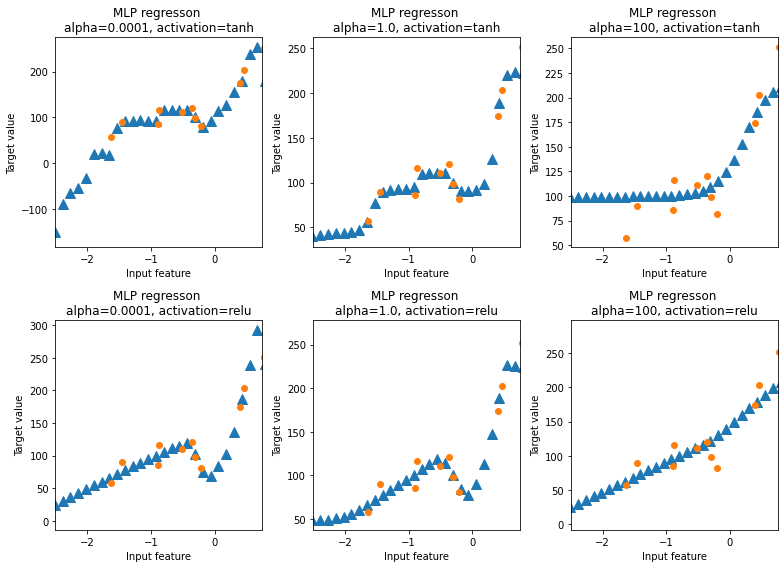

In [56]:
## MLPRegressor falta hacer ese ejercicio
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
# Synthetic dataset for simple regression
from sklearn.datasets import make_regression

X_R1, y_R1 = make_regression(n_samples= 100, n_features=1, 
                             n_informative=1, bias = 150, 
                             noise = 30, random_state = 0)


fig, subaxes = plt.subplots(2,3,figsize =(11,8))

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)
X_predict_input = np.linspace(-3,3, 50).reshape(-1,1)

for thisaxisarrow, thisactiviation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisarrow):
        mlpreg = MLPRegressor( hidden_layer_sizes=[100,100],
                               activation=thisactiviation,
                               alpha = thisalpha,
                               solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')   
        thisaxis.set_ylabel('Target value') 
        thisaxis.set_title('MLP regresson \nalpha={}, activation={}'.format(thisalpha, thisactiviation) )
        plt.tight_layout()   
  


In [ ]:
# hidden_layer_sizes: sets the number of hidden layers , and number of hidden units per layer(each list element)
# alpha: controls weight of regularization penalty that shrinks weights to zero. Defualt: 0.0001
# activation: controsl nonlinear function used for the activation function  , including 'relu' (default), 'logistic', 'tanh'
# solver: finds the optimum weights (adam is the default value)
# check the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html